# Importing the libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [79]:
warnings.filterwarnings('ignore')

# Loading the dataset

In [80]:
data = pd.read_csv('car_data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [81]:
data.shape

(301, 9)

In [82]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [84]:
data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

# Feature Engineering

In [85]:
data.drop('Car_Name', inplace=True, axis=1)

In [86]:
def years_old(year):
    return 2021-year

data['Year'] = data['Year'].apply(years_old)

In [87]:
data.rename(
    columns = {
    'Year': 'years_old',
    'Selling_Price': 'sp',
    'Present_Price': 'pp',
    'Kms_Driven': 'kms_driven',
    'Fuel_Type': 'fuel_type',
    'Seller_Type': 'seller_type',
    'Transmission': 'transmission',
    'Owner': 'owner'
}, inplace=True)

In [88]:
print(data['owner'].unique())
print(data['fuel_type'].unique())
print(data['seller_type'].unique())
print(data['transmission'].unique())

[0 1 3]
['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [89]:
data['target'] = data['sp']
data.drop('sp', inplace=True, axis=1)
data.head()

,years_old,pp,kms_driven,fuel_type,seller_type,transmission,owner,target
0,7,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,8,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,4,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,10,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,7,6.87,42450,Diesel,Dealer,Manual,0,4.60


# EDA
#### Univariate Analysis

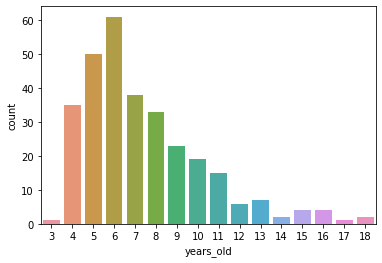

In [90]:
sns.countplot(data['years_old'])
plt.show()

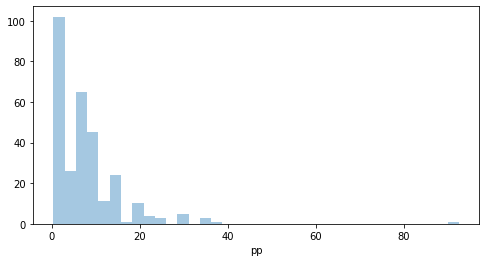

In [91]:
plt.figure(figsize=(8,4))
sns.distplot(data['pp'], kde=False)
plt.show()

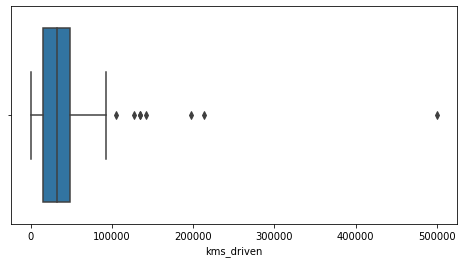

In [92]:
plt.figure(figsize=(8,4))
sns.boxplot(data['kms_driven'])
plt.show()

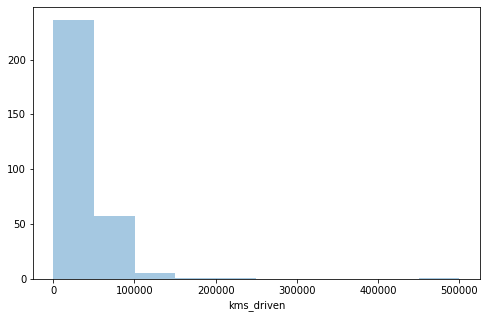

In [93]:
plt.figure(figsize=(8,5))
sns.distplot(data['kms_driven'], kde=False, bins=10)
plt.show()

Most cars are 4-8 years old

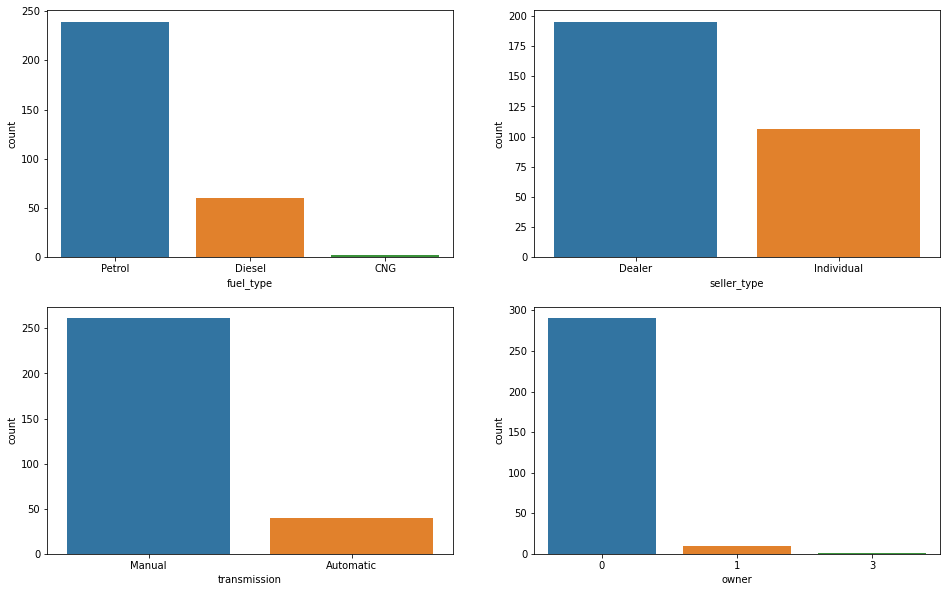

In [94]:
plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
sns.countplot(data['fuel_type'])

plt.subplot(2, 2, 2)
sns.countplot(data['seller_type'])

plt.subplot(2, 2, 3)
sns.countplot(data['transmission'])

plt.subplot(2, 2, 4)
sns.countplot(data['owner'])

plt.show()

#### Bivariate Analysis

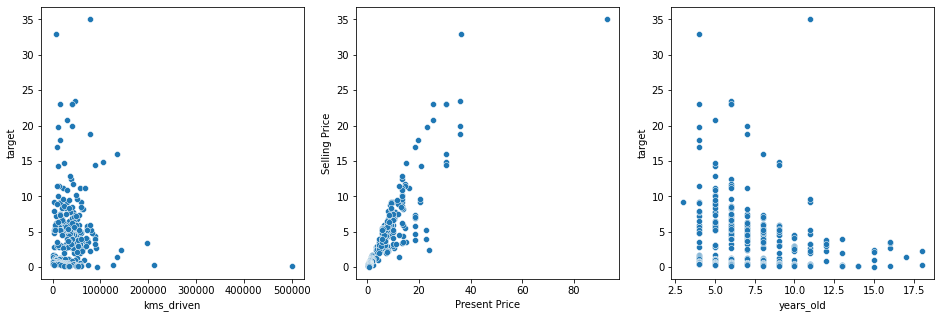

In [95]:
plt.figure(figsize=(16,5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='kms_driven', y='target', data=data)

plt.subplot(1, 3, 2)
sns.scatterplot(x='pp', y='target', data=data)
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

plt.subplot(1, 3, 3)
sns.scatterplot(x='years_old', y='target', data=data)

plt.show()

<li>Selling Price doesn't depends on kms_driven</li>
<li>Selling Price increases as the Present market Price increases</li>
<li>Older cars have low selling price</li>

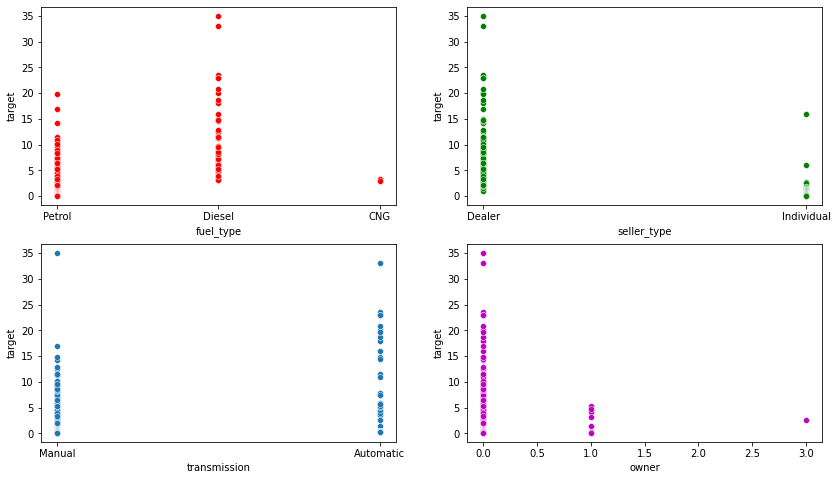

In [96]:
plt.figure(figsize=(14,8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='fuel_type', y='target', data=data, color='r')

plt.subplot(2, 2, 2)
sns.scatterplot(x='seller_type', y='target', data=data, color='g')

plt.subplot(2, 2, 3)
sns.scatterplot(x='transmission', y='target', data=data)

plt.subplot(2, 2, 4)
sns.scatterplot(x='owner', y='target', data=data, color='m')

plt.show()

In [97]:
# sns.pairplot(data)
# plt.show()

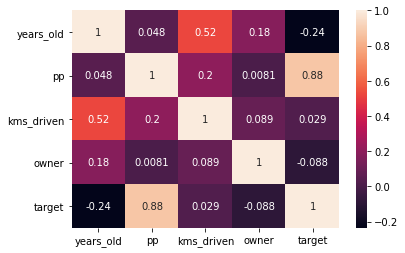

In [98]:
sns.heatmap(data.corr(), annot=True)
plt.show()

<li>SP and PP are highly correlated</li>
<li>Rest are less correlated with SP</li>

# Split into train test

In [99]:
data.head()

,years_old,pp,kms_driven,fuel_type,seller_type,transmission,owner,target
0,7,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,8,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,4,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,10,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,7,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [100]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [101]:
print(len(x))
print(len(y))

301
301


In [102]:
x[:2]

array([[7, 5.59, 27000, 'Petrol', 'Dealer', 'Manual', 0],
       [8, 9.54, 43000, 'Diesel', 'Dealer', 'Manual', 0]], dtype=object)

In [103]:
y[:2]

array([3.35, 4.75])

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [105]:
x_train[0]

array([4, 1.78, 4000, 'Petrol', 'Individual', 'Manual', 0], dtype=object)

In [106]:
type(x_train)

numpy.ndarray

In [107]:
y_train[:2]

array([ 1.65, 14.73])

In [108]:
x_test[:2]
# OneHotEncoding increased the size of x_train by 1

array([[5, 8.5, 15059, 'Petrol', 'Dealer', 'Automatic', 0],
       [8, 4.6, 30000, 'Petrol', 'Dealer', 'Manual', 0]], dtype=object)

In [109]:
y_test[:2]

array([7.4, 4. ])

# ONE HOT ENCODER

<b>NOTE: pd.get_dummies cann't be used in production where the new data is not known</b><br>
<b>So, use OneHotEncoder</b><br>
ct = ColumnTransformer(...)<br>
<b>ct will be used to encode the new data</b>

In [114]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [115]:
print(x_train[0])

[4 1.78 4000 'Petrol' 'Individual' 'Manual' 0]


In [116]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), [3,4,5,6])], remainder='passthrough')
x_train = ct.fit_transform(x_train)
x_train[0]

# fit_transform() always returns numpy array

array([0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 4, 1.78, 4000],
      dtype=object)

# Feature Scaling

In [124]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train[:, 9:] = sc.fit_transform(x_train[:, 9:])

x_train[:2]

array([[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, -1.1355447040152986,
        -0.6667382787185484, -0.7954955410255234],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, -0.7974172487253834,
        0.8205494710219995, -0.34195292847895287]], dtype=object)

##### NOTE: While predicting new data, we need to apply ct.transform(), then drop some columns, then apply standard scaler and then predict

# Import

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Function for different models

In [126]:
print(x_test[0])

[5 8.5 15059 'Petrol' 'Dealer' 'Automatic' 0]


In [127]:
x_test = ct.transform(x_test)

In [128]:
type(x_test)

numpy.ndarray

In [129]:
x_test[0]

array([0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 5, 8.5, 15059],
      dtype=object)

In [130]:
# Perform OneHotEncoding and StandardScalar in test data

x_test[:, 9:] = sc.transform(x_test[:, 9:])

In [131]:
cv = 5
R2 = []
CV = []

def model(algorithm, x_train, y_train, x_test, y_test):
    algorithm.fit(x_train, y_train)
    
    y_pred = algorithm.predict(x_test)
    _r2 = r2_score(y_test, y_pred)
    _cv = cross_val_score(algorithm, x_train, y_train, cv=cv)
    
    # Appending results to Lists
    R2.append(_r2)
    CV.append(_cv.mean())
    
    # Printing results
    print(algorithm, '\n')
    print("r2 score : ", _r2, '\n')
    print("CV scores: ", _cv, '\n')
    print("CV scores mean:", _cv.mean())
    
    # Plot for prediction vs originals
    plt.figure(figsize=(12, 8))
    sns.lineplot(x = np.arange(0, len(y_test)), y = y_test)
    
    sns.lineplot(x = np.arange(0, len(y_pred)), y = y_pred, color='r')
    
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")

    plt.show()

## Linear Regression

LinearRegression() 

r2 score :  0.8711671830609984 

CV scores:  [ 8.99121887e-01 -1.36781452e+26  8.29800686e-01  8.17690756e-01
  7.61139252e-01] 

CV scores mean: -2.735629037129276e+25


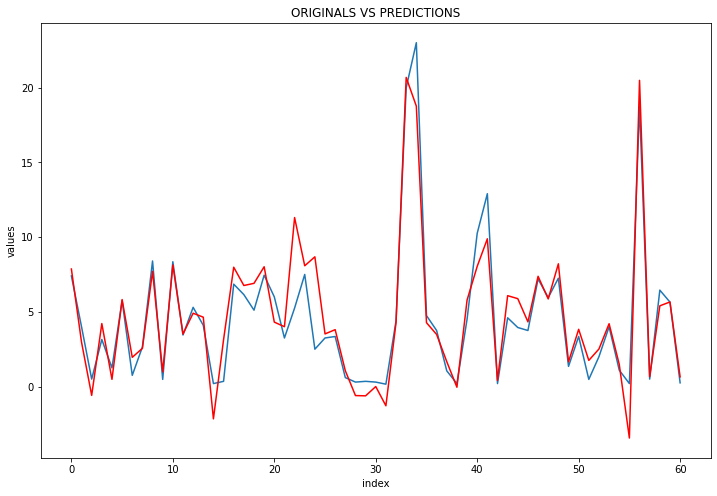

In [132]:
lr = LinearRegression()
model(lr, x_train, y_train, x_test, y_test)

DecisionTreeRegressor() 

r2 score :  0.9516149642896019 

CV scores:  [0.93431793 0.89685228 0.79572125 0.90507099 0.6979061 ] 

CV scores mean: 0.8459737099277145


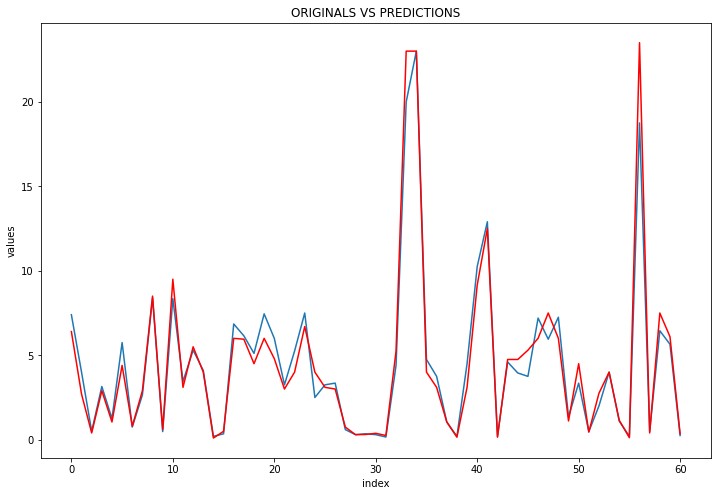

In [133]:
dtr = DecisionTreeRegressor()
model(dtr, x_train, y_train, x_test, y_test)

RandomForestRegressor(random_state=42) 

r2 score :  0.8875192521243284 

CV scores:  [0.93293871 0.96281459 0.84788002 0.94325862 0.72893555] 

CV scores mean: 0.8831654988714945


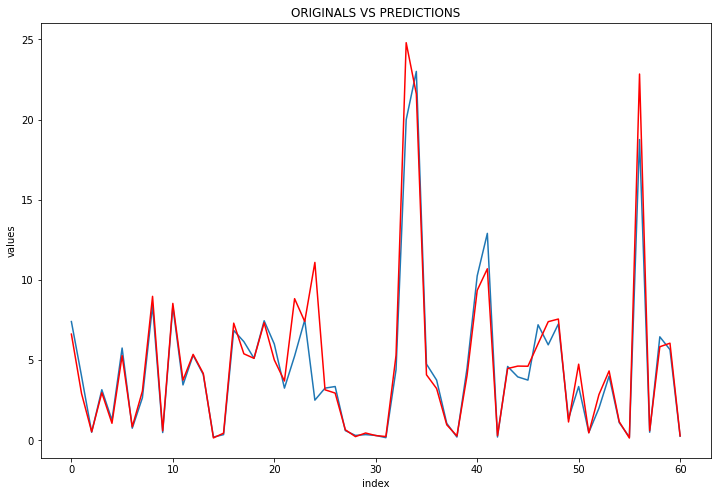

In [134]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,x_train,y_train,x_test,y_test)

AdaBoostRegressor(n_estimators=100, random_state=42) 

r2 score :  0.8504289359200086 

CV scores:  [0.91925498 0.89197768 0.8177801  0.88386804 0.71737068] 

CV scores mean: 0.8460502950831665


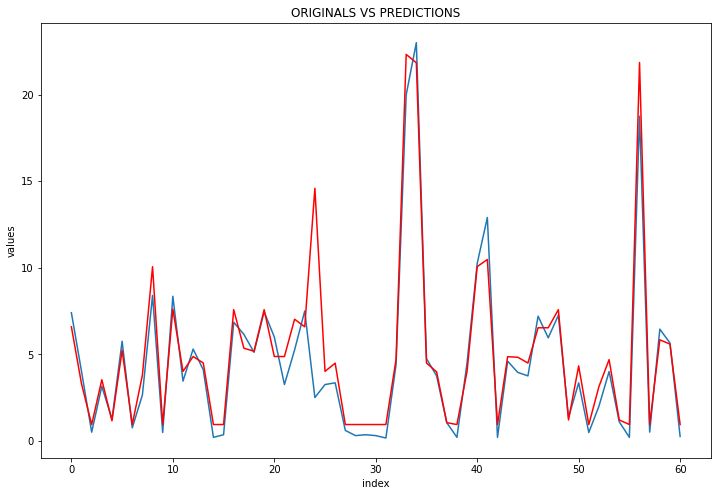

In [135]:
abr = AdaBoostRegressor(n_estimators = 100, random_state = 42)
model(abr,x_train,y_train,x_test,y_test)

GradientBoostingRegressor(random_state=42) 

r2 score :  0.9341055967151789 

CV scores:  [0.94383315 0.94453734 0.89842    0.93285189 0.75795665] 

CV scores mean: 0.895519808528887


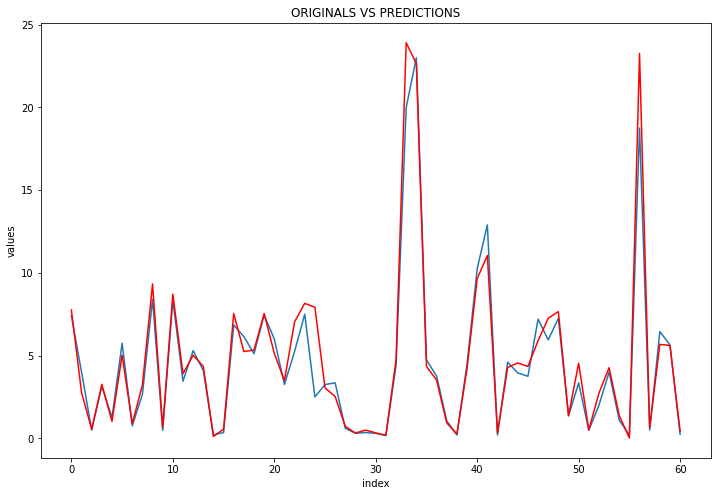

In [136]:
gbr = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
model(gbr,x_train,y_train,x_test,y_test)

In [137]:
Model = ["LinearRegression","DecisionTreeRegressor","RandomForestRegressor", "AdaBoostRegressor", "GradientBoostingRegressor"]
results = pd.DataFrame({'Model': Model,'R Squared': R2,'CV score mean': CV})
results

,Model,R Squared,CV score mean
0,LinearRegression,0.871167,-2.735629e+25
1,DecisionTreeRegressor,0.951615,8.459737e-01
2,RandomForestRegressor,0.887519,8.831655e-01
3,AdaBoostRegressor,0.850429,8.460503e-01
4,GradientBoostingRegressor,0.934106,8.955198e-01


In [145]:
import pickle

# open a file, where you want to store the data
file = open("random_forst_regression_model.pkl", 'wb')

# dump information to that file
pickle.dump([dtr, ct, sc], file)

###### Predict using random forest

In [146]:
m = [[3,1500000,25000,'Diesel','Individual','Automatic',3]]
m = ct.transform(m)
m[:,9:] = sc.transform(m[:,9:])
rf.predict(m)

array([30.0213])